<a href="https://colab.research.google.com/github/MingzheHu-Duke/SKlearn_class_notes/blob/main/RandomForest_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

In [19]:
features = pd.read_csv("temps.csv")
features = features.drop(columns=["forecast_noaa", "forecast_acc", "forecast_under"])
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [20]:
print("The shape of our features is:", features.shape)

The shape of our features is: (348, 9)


In [21]:
# See abnormalies
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [22]:
# One hot encoding
features = pd.get_dummies(features)

features.iloc[:, 5:].head(5)

,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,1,0,0,0,0,0,0
1,45.7,44,61,0,0,1,0,0,0,0
2,45.8,41,56,0,0,0,1,0,0,0
3,45.9,40,53,0,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,0,1,0


In [23]:
labels = np.array(features["actual"])

# Remove the labels from features
features = features.drop("actual", axis=1)

feature_list = list(features.columns)

features = np.array(features)

In [24]:
# Split the data into training and testing data sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

In [25]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


###Establish a baseline

In [26]:
# # The baseline predictions are the historical average
baseline_preds = test_features[:, feature_list.index("average")]

# Baseline errors
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


### Train Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model on the training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Evaluate on the test set

In [28]:
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the error
print("Thee Absolute Error:", round(np.mean(errors), 2))

Thee Absolute Error: 3.83


In [29]:
# Calulate the mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracies
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 2), "%")

Accuracy: 93.98 %


In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
print("R2 score:", r2_score(test_labels, predictions))

R2 score: 0.8173586859802092


In [32]:
print("MSE score:", mean_squared_error(test_labels, predictions))

MSE score: 25.399714471264364


In [33]:
print("MAE score:", mean_absolute_error(test_labels, predictions))

MAE score: 3.834172413793103


###Visualizing a Single decision tree

In [34]:
from sklearn.tree import export_graphviz
import pydot

In [35]:
# Pull out one decsion tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file="tree.dot", feature_names=feature_list, rounded=True, precision=1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file("tree.dot")

# Write graph to a png file
graph.write_png("tree.png")

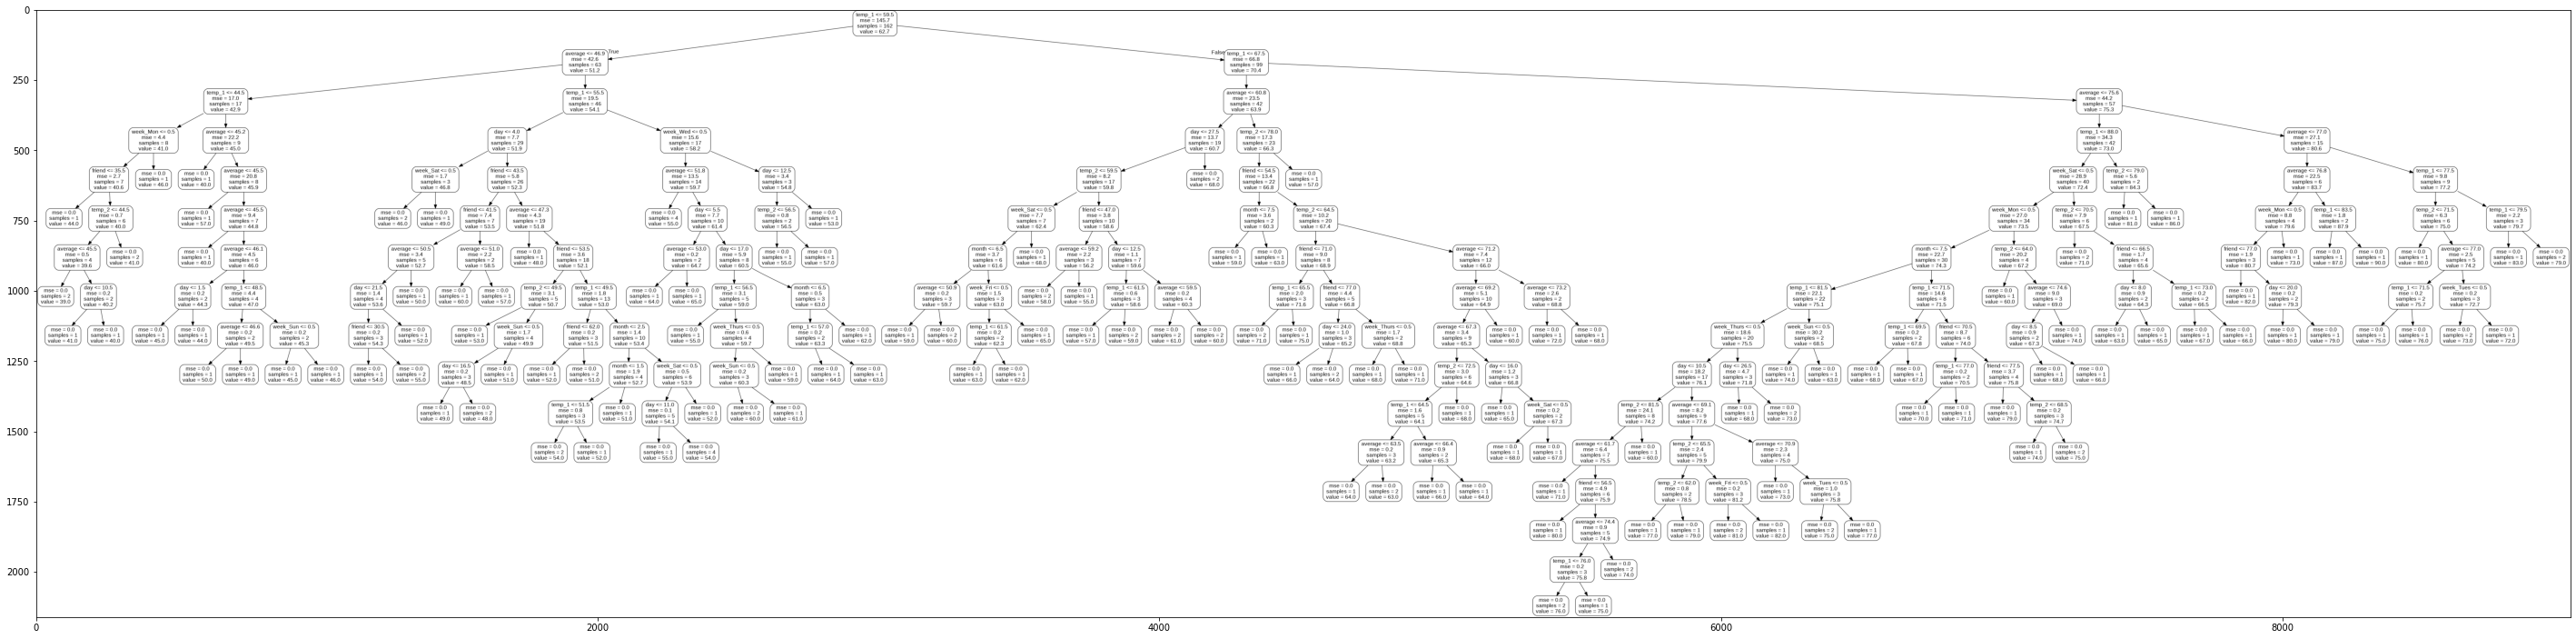

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(50, 50))
img = mpimg.imread('tree.png')
imgplot = plt.imshow(img)
plt.show()

###Limit the depth of the tree

In [37]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

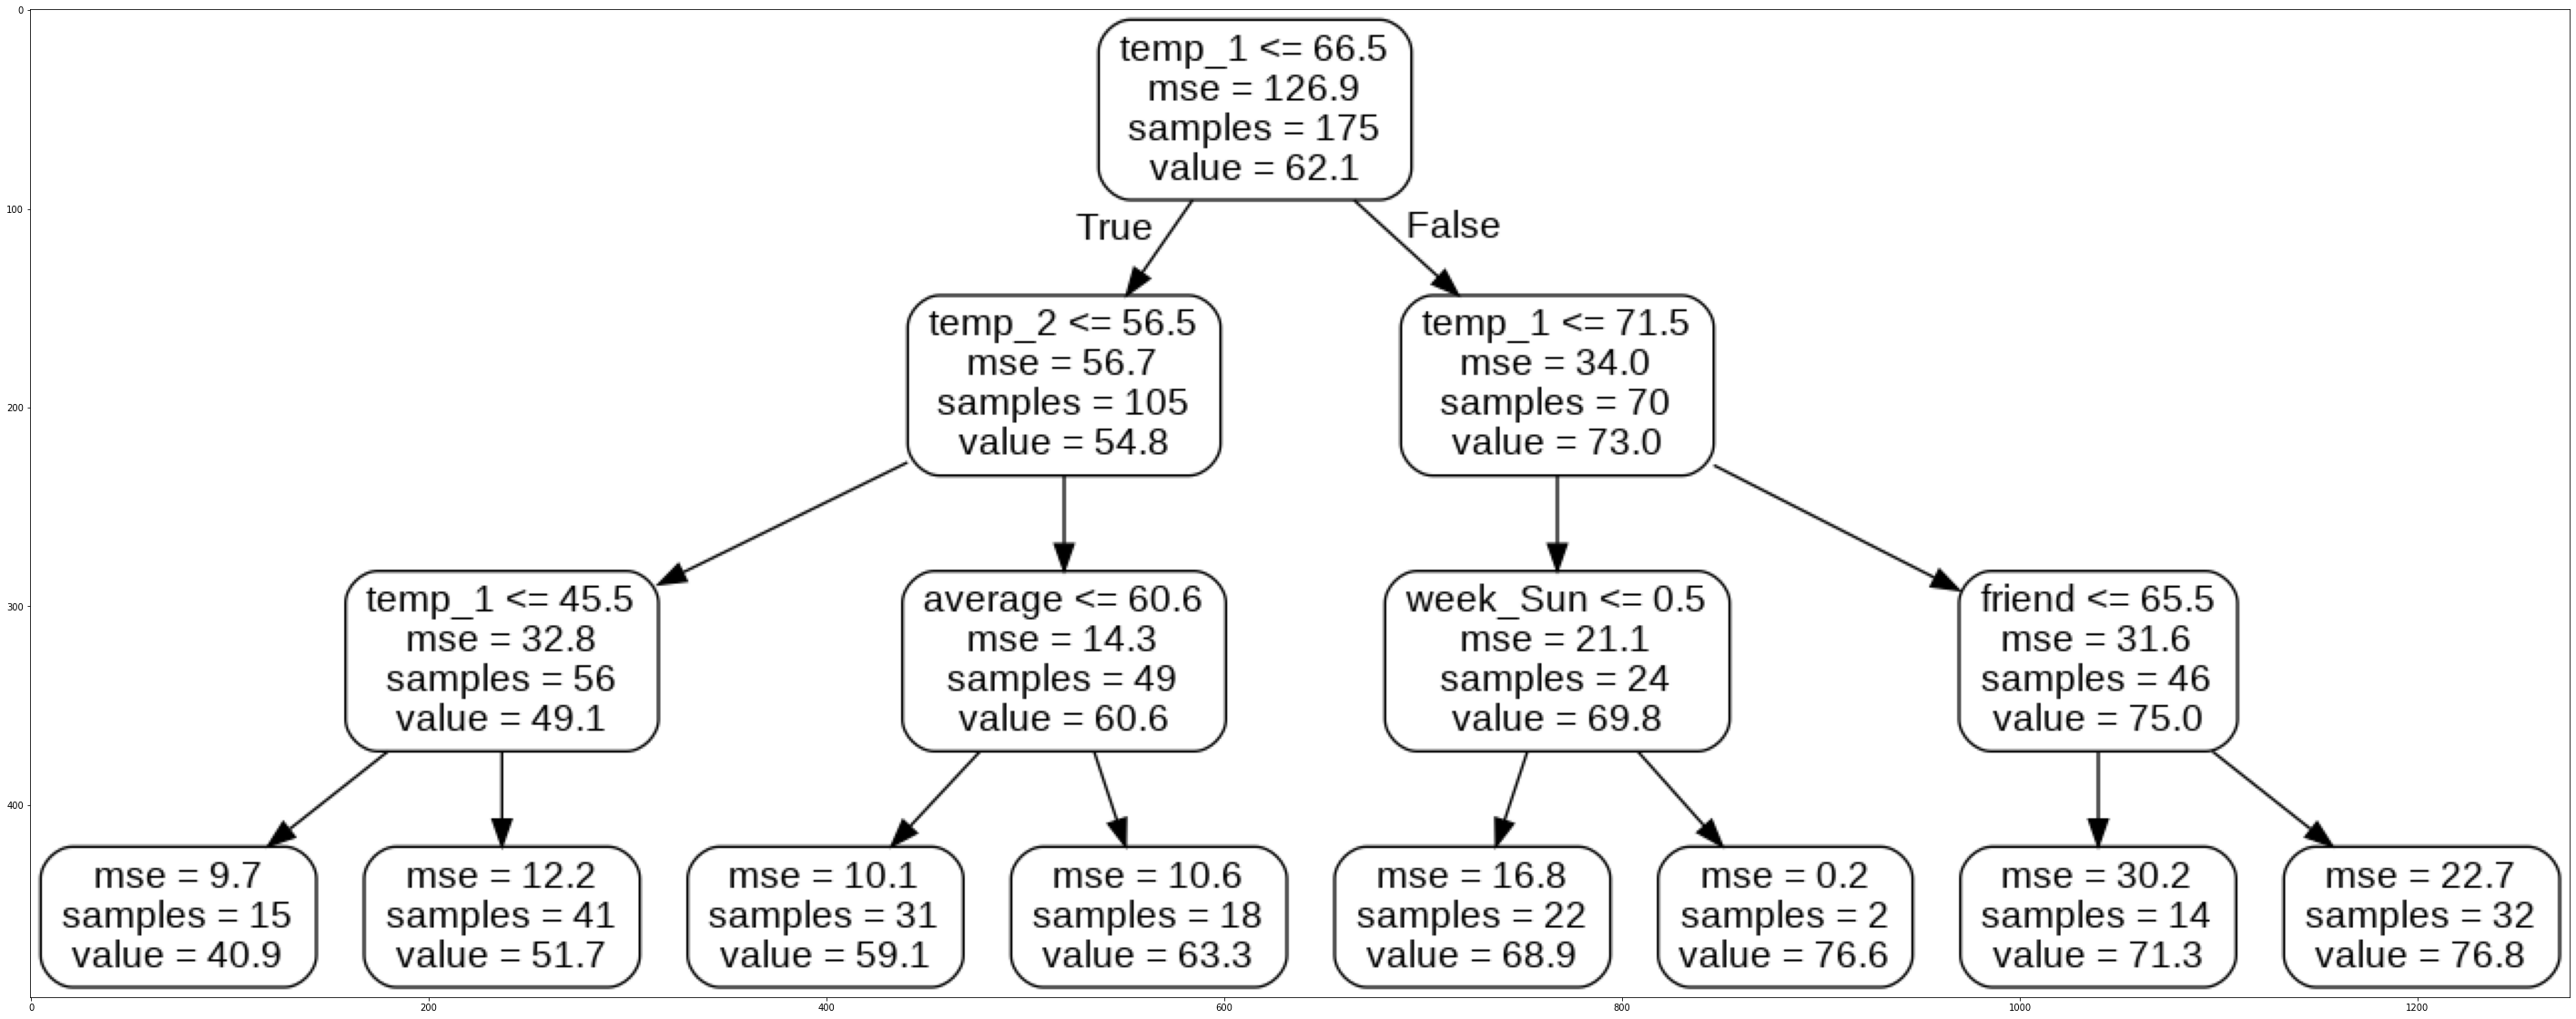

In [38]:
plt.figure(figsize=(50, 50))
img = mpimg.imread('small_tree.png')
imgplot = plt.imshow(img)
plt.show()

In [56]:
# Get numeric feature importance
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.69
Variable: average              Importance: 0.2
Variable: day                  Importance: 0.03
Variable: friend               Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [48]:
# New random forest with only two of the most important variables
rf_most_important = RandomForestRegressor(n_estimators=1000, random_state=42)

# Extract the most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


This tells us that we actually do not need to collect all the data to make anaccuarate prediction.

### Visualization

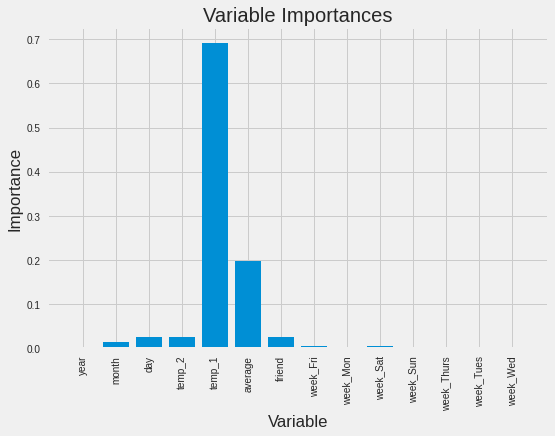

In [62]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use("fivethirtyeight")

# List of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation="vertical")

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');